In [2]:
import sys
import os
os.chdir('/mnt/cimec-storage6/users/nicola.debole/home/CQA')
sys.path.append('/mnt/cimec-storage6/users/nicola.debole/home/CQA')
from datasets import GenericDataset
import torch
data = GenericDataset(ds_name='shapes3d', split='val')
from sklearn.metrics import classification_report
llava = torch.load("./data/llava-phi3_annotations/shapes3d_val_0_5000.pth")
print(llava.shape)
num_samples,num_concepts = llava.shape

accuracies = []
f1 = []
for c in range(num_concepts):
    y_true = [data[i][1][c] for i in range(num_samples)]
    cr = classification_report(y_true,llava[:,c], output_dict=True)
    accuracies.append(cr['accuracy'])

    f1.append(cr['macro avg']['f1-score'])
    
print(accuracies)
print(f1)


2025-02-27 10:22:42.575 | DEBUG    | datasets:get_dataset:113 - Getting dataset shapes3d with kwargs {'split': 'val'}
2025-02-27 10:22:42.908 | DEBUG    | datasets:__init__:33 - Loading dataset shapes3d from ./data/shapes3d/
/tmp/ipykernel_1719806/2250231021.py:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case wh

torch.Size([5000, 42])


/mnt/cimec-storage6/users/nicola.debole/miniconda3/envs/vlg-cbm/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/mnt/cimec-storage6/users/nicola.debole/miniconda3/envs/vlg-cbm/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/mnt/cimec-storage6/users/nicola.debole/miniconda3/envs/vlg-cbm/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division`

[0.7658, 0.799, 0.6566, 0.6248, 0.7206, 0.6526, 0.5728, 0.8952, 0.4806, 0.6646, 0.7922, 0.7984, 0.7052, 0.7344, 0.7932, 0.7652, 0.6792, 0.9078, 0.6614, 0.7374, 0.7426, 0.8136, 0.662, 0.6646, 0.745, 0.5484, 0.6104, 0.9048, 0.6698, 0.7384, 0.867, 0.8856, 0.7624, 0.6528, 0.8462, 0.679, 0.8132, 0.8234, 0.647, 0.5514, 0.5644, 0.6162]
[0.4840034458523087, 0.4959308832464579, 0.45160418073720876, 0.4472091842952719, 0.49128043004246513, 0.47335264434276136, 0.43839970418177676, 0.48168529038680524, 0.3953960984353819, 0.4713605062229096, 0.504838145934826, 0.5062833283243295, 0.4686796379004872, 0.48871334713807296, 0.4865685539228149, 0.5004425381263616, 0.47160516862383584, 0.4758360415137855, 0.47505695771538836, 0.4920450698776537, 0.48183361810340475, 0.5007625691058165, 0.46211562591663136, 0.47176307468287354, 0.49917475784215737, 0.42531087678319063, 0.4543332994952751, 0.4770973012068946, 0.4638287021361571, 0.4859292387099371, 0.47606763628032284, 0.48156510780907963, 0.500655704630

# LOAD THE DATA

In [ ]:
import sys
import os
os.chdir('/mnt/cimec-storage6/users/nicola.debole/home/CQA')
sys.path.append('/mnt/cimec-storage6/users/nicola.debole/home/CQA')
from datasets import GenericDataset
from torchvision import transforms
t = transforms.Compose([
            transforms.ToTensor(),
            transforms.Resize((224,224)),
        ])

model_name = model_folder.split("_")[0]
dataset = model_folder.split("_")[1]

if dataset=='celeba':
    concept_set = "/mnt/cimec-storage6/users/nicola.debole/home/CQA/data/concepts/celeba/handmade.txt"
    labels_names = ["female", "male"]
elif dataset=='shapes3d':
    concept_set = "/mnt/cimec-storage6/users/nicola.debole/home/CQA/data/concepts/shapes3d/shapes3d.txt"
    labels_names = ["not a red pill", "red pill"]
else:
    raise NotImplementedError()

data = GenericDataset(ds_name = dataset, split = 'test', transform = t)


2025-02-20 17:12:54.617 | DEBUG    | datasets:<module>:20 - Available datasets: {'chestmnist': <class 'datasets.dataset_classes.CHESTMINST_Dataset'>, 'cub': <class 'datasets.dataset_classes.CUBDataset'>, 'celeba': <class 'datasets.dataset_classes.CelebA'>, 'celeba_mini': <class 'datasets.dataset_classes.CelebAMini'>, 'celeba_original': <class 'datasets.dataset_classes.CelebAOriginal'>, 'cifar10': <class 'datasets.dataset_classes.Cifar10Custom'>, 'shapes3d_mini': <class 'datasets.dataset_classes.SHAPES3DMini'>, 'shapes3d_original': <class 'datasets.dataset_classes.SHAPES3DOriginal'>, 'shapes3d': <class 'datasets.dataset_classes.SHAPES3D_Custom'>}
2025-02-20 17:12:54.619 | DEBUG    | datasets:get_dataset:113 - Getting dataset shapes3d with kwargs {'split': 'test', 'transform': Compose(
    ToTensor()
    Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
)}
2025-02-20 17:12:55.109 | DEBUG    | datasets:__init__:33 - Loading dataset shapes3d from ./data/shapes3

# Run the model

In [3]:
import sys
import os
os.chdir('/mnt/cimec-storage6/users/nicola.debole/home/CQA')
sys.path.append('/mnt/cimec-storage6/users/nicola.debole/home/CQA')
from utils.args_utils import load_args
from models import get_model
from loguru import logger
from argparse import Namespace

args = {'load_dir':os.path.join(saved_models_folder,model_folder),
        
    }
args = Namespace(**args)
args = load_args(args)
# Load model
model = get_model(args)
logger.debug(f"Model loaded: {model}")

2025-02-20 17:12:58.442 | DEBUG    | models:<module>:20 - Available models: {'oracle': <class 'models.oracle.ORACLE'>, 'vlgcbm': <class 'models.vlgcbm.VLGCBM'>, 'labo': <class 'models.labo.LABO'>, 'lfcbm': <class 'models.lfcbm.LFCBM'>, 'resnetcbm': <class 'models.resnetcbm.RESNETCBM'>}
2025-02-20 17:12:58.443 | DEBUG    | utils.args_utils:load_args:13 - Loading from /mnt/cimec-storage6/users/nicola.debole/home/CQA/saved_models/labo_shapes3d_2025_02_20_16_58
2025-02-20 17:12:58.448 | DEBUG    | utils.args_utils:load_args:22 - Namespace(load_dir='/mnt/cimec-storage6/users/nicola.debole/home/CQA/saved_models/labo_shapes3d_2025_02_20_16_58', model='labo', logger='DEBUG', dataset='shapes3d', config=None, save_dir='./saved_models/labo_shapes3d_2025_02_20_16_58', wandb=True, seed=42, resume=None, concept_set='./data/concepts/shapes3d/shapes3d.txt', device='cuda', batch_size=258, glm_alpha=0.99, glm_step_size=0.1, n_iters=2000, lam=0.0007, saga_batch_size=256, clip_name='ViT-B/16', feature_lay

In [4]:
outputs = model.run('test')

2025-02-20 17:13:02.861 | DEBUG    | models.base:run:58 - Running model on test split.


2025-02-20 17:13:06.371 | DEBUG    | datasets:get_dataset:113 - Getting dataset shapes3d with kwargs {'split': 'test', 'transform': Compose(
    Resize(size=224, interpolation=bicubic, max_size=None, antialias=True)
    CenterCrop(size=(224, 224))
    <function _convert_image_to_rgb at 0x7f70f8b4bd80>
    ToTensor()
    Normalize(mean=(0.48145466, 0.4578275, 0.40821073), std=(0.26862954, 0.26130258, 0.27577711))
)}
Running test: 100%|██████████| 117/117 [00:47<00:00,  2.46it/s]


In [5]:
# Load last layer
try:
    print(model.model.final.weight)
    last_layer_weights = model.model.final.weight
except:
    last_layer_weights = model.model.final_layer.weight
    print(last_layer_weights)

Parameter containing:
tensor([[ 0.0000e+00,  0.0000e+00,  1.2179e-01,  2.6032e-01,  3.4356e-01,
          1.6073e-01,  1.4545e-01,  1.8236e-01,  2.1186e-01,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  7.0622e-03,  1.0323e-01,  9.0829e-02,
          0.0000e+00,  7.1468e-02,  1.0537e-01,  1.3121e-01,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  2.7493e-06,  4.6733e-02,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00, -1.1828e-01],
        [ 0.0000e+00,  0.0000e+00, -1.2179e-01, -2.6032e-01, -3.4356e-01,
         -1.6073e-01, -1.4545e-01, -1.8236e-01, -2.1186e-01,  0.0000e+00,
          0.0000e+00,  0.0000e+00, -7.0620e-03, -1.0323e-01, -9.0829e-02,
          0.0000e+00, -7.1468e-02, -1.0537e-01, -1.3122e-01,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00, -2.407

In [6]:
import torch
from matplotlib import pyplot as plt
with open(concept_set) as f:
        concept_names = f.read().split("\n")

def get_sample_decision_summary(idx):
    img,concepts,label = data[idx]
    prediction_label = outputs['labels_pred'][idx]
    pred = torch.argmax(prediction_label)
    print(f"Predicted {labels_names[pred]} because of:")
    concept_activations = outputs['concepts_pred'][idx].cpu()
    weights_label = last_layer_weights[pred].cpu()
    positive, pos_ids = torch.topk(weights_label*concept_activations, k=3, largest = True)
    negative, neg_ids = torch.topk(weights_label*concept_activations, k=3, largest = False)
    for i,p in enumerate(positive):
        index = pos_ids[i]
        print(f"{p.item()} {concept_names[index]} ({index})")
    for i,n in enumerate(negative):
        index = neg_ids[i]
        print(f"{n.item()} {concept_names[index]} ({index})")
    plt.imshow(img.permute(1,2,0))
    

import random

num = random.randint(0, 4999)  # Includes both 0 and 480
print(num)

num = 4468
get_sample_decision_summary(num)





FileNotFoundError: [Errno 2] No such file or directory: '/mnt/cimec-storage6/users/nicola.debole/home/CQA/data/concepts/celeba/shapes3d.txt'

  0%|          | 0/19962 [00:00<?, ?it/s]

100%|██████████| 19962/19962 [07:24<00:00, 44.87it/s]


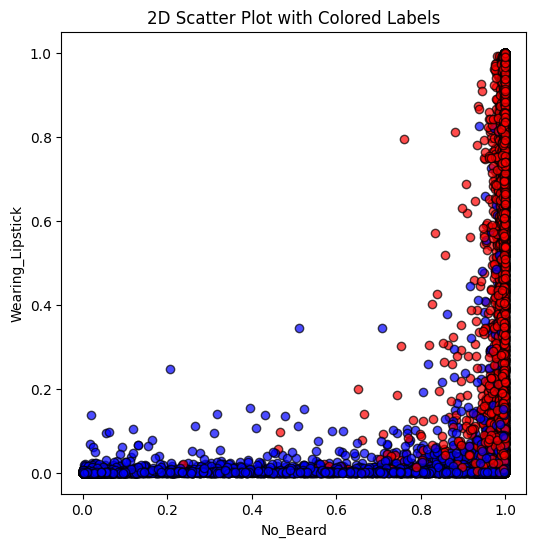

In [ ]:
from tqdm import tqdm
concept_activations = outputs['concepts_pred']
num_samples = concept_activations.shape[0]

x_idx = 23
y_idx = 35

# Plot the scatter plot
plt.figure(figsize=(6, 6))
for i in tqdm(range(num_samples)):
    x = concept_activations[i,x_idx]
    y = concept_activations[i,y_idx]
    label = outputs['labels_gt'][i]
    if label == 0:
        color = 'red'
    else:
        color = 'blue'
    plt.scatter(x, y, c=color, alpha=0.7, edgecolors='k')

# Labels and title
plt.xlabel(f'{concept_names[x_idx]}')
plt.ylabel(f'{concept_names[y_idx]}')
plt.title('2D Scatter Plot with Colored Labels')
plt.show()
